In [1]:
import tensorflow.keras as kr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [3]:
# Read in the dataset
df = pd.read_csv("./powerproduction.csv")
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [4]:
train = df.sample(frac=0.8, random_state=0)
test = df.drop(train.index)

train.head(), test.head()

(      speed    power
 90    4.905    7.060
 254  12.713   51.149
 283  14.489   71.763
 445  22.422   99.357
 461  23.273  113.556,
     speed  power
 9   0.526  5.553
 25  1.051  2.085
 28  1.151  1.208
 31  1.301  0.000
 32  1.401  4.156)

In [5]:
# Create a neural network with one neuron.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

In [6]:
# Train the neural network on our training data.
model.fit(train.speed, train.power, epochs=100, batch_size=10)

Epoch 1/100
40/40 [==============================] - 0s 507us/step - loss: 2468.5747
Epoch 2/100
40/40 [==============================] - 0s 496us/step - loss: 2417.5730
Epoch 3/100
40/40 [==============================] - 0s 496us/step - loss: 2368.4641
Epoch 4/100
40/40 [==============================] - 0s 581us/step - loss: 2320.8618
Epoch 5/100
40/40 [==============================] - 0s 491us/step - loss: 2273.1182
Epoch 6/100
40/40 [==============================] - 0s 503us/step - loss: 2227.6768
Epoch 7/100
40/40 [==============================] - 0s 508us/step - loss: 2182.3010
Epoch 8/100
40/40 [==============================] - 0s 746us/step - loss: 2138.1951
Epoch 9/100
40/40 [==============================] - 0s 553us/step - loss: 2094.2327
Epoch 10/100
40/40 [==============================] - 0s 490us/step - loss: 2051.9268
Epoch 11/100
40/40 [==============================] - 0s 502us/step - loss: 2010.4291
Epoch 12/100
40/40 [==============================] - 0s 503us/

Epoch 97/100
40/40 [==============================] - 0s 502us/step - loss: 570.8237
Epoch 98/100
40/40 [==============================] - 0s 2ms/step - loss: 568.3982
Epoch 99/100
40/40 [==============================] - 0s 1ms/step - loss: 566.1476
Epoch 100/100
40/40 [==============================] - 0s 2ms/step - loss: 563.9706


In [7]:
# Take four hand-picked values and see their predictions.
model.predict([1.0, 2.0, 3.0, 100.0])

array([[  5.8395996],
       [  9.413436 ],
       [ 12.987272 ],
       [359.64938  ]], dtype=float32)

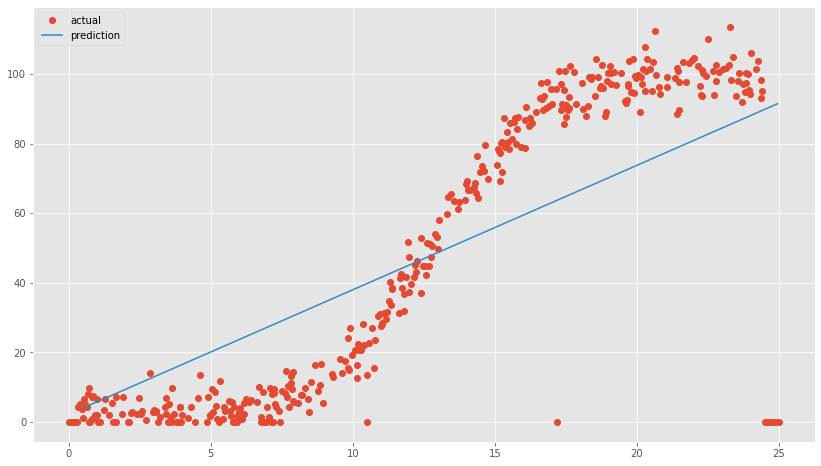

In [8]:
# Let's plot our predictions of the x values we trained on
plt.plot(train.speed, train.power, 'o', label='actual')
plt.plot(test.speed, model.predict(test.speed), label='prediction')
plt.legend();

In [9]:
# Save the model
model.save('power_prod.h5')